In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.utils import shuffle


%matplotlib inline



%load_ext autoreload
%autoreload 2


In [2]:
mnist = pd.read_csv('/home/oyku/Desktop/Oyku/Convex 10-725/train_mnist.csv')

mnist = pd.DataFrame.as_matrix(mnist)

mnist_shuffled = shuffle(mnist)

print mnist.shape

(42000, 785)


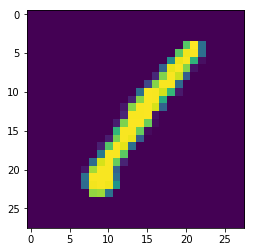

In [3]:
s = plt.imshow(mnist[0,1::].reshape([28,28]))


In [4]:
label = mnist[:,0]
data = mnist[:,1::]
print data.shape
print np.sum((label == 0) + 0)
print np.sum((label == 1) + 0)

new_data = data[(label < 2), :]
new_label = label[(label < 2)]
print new_data.shape
print new_label.shape

(42000, 784)
4132
4684
(8816, 784)
(8816,)


In [5]:
X = new_data
y = new_label.reshape([new_label.shape[0], 1])
y[y == 0] = -1
print X.shape
print y.shape

(8816, 784)
(8816, 1)


In [6]:
#Centralize the data
for i in xrange(X.shape[1]):
    X[:,i] = X[:,i] - np.mean(X[:,i])
X = np.append(X, np.ones([X.shape[0],1]), axis = 1)
print X.shape

(8816, 785)


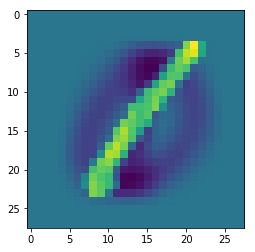

In [7]:
s = plt.imshow(X[0,0:-1].reshape([28,28]))


In [8]:
#Train and Validation sets
train = X[0:6100,:]
train_y = y[0:6100,:]

valid = X[6100:7458,:]
valid_y = y[6100:7458,:]

test = X[7458:8816,:]
test_y = y[7458:8816,:]

print train.shape
print valid.shape
print test.shape


(6100, 785)
(1358, 785)
(1358, 785)


In [9]:
#model parameters
n = train.shape[0] #number of examples in train
d = train.shape[1] #number of features in train

#C = 10
# epsilon = 0.5
# t = 5
alpha = 0.5

beta = 0.9 #backtracking step decrease rate
#t_mu = 1.2 #scaling factor of t for the barrier method

In [10]:
initial_w = np.random.rand(1,d)*1e-3


# Gardient Descent

In [11]:
w = initial_w[:,:]

runs = 10
epoch = 10
loss_store = np.zeros([1,runs*epoch])
accuracy = np.zeros([1,epoch])


count = 0
for e in xrange(epoch):
    for r in xrange(runs):
        step = 1

        dw = -(train_y.T - w.dot(train.T)).dot(train)
        dw /= n

        #Backtracking
        temp_w = w - step*dw

        loss = 0.5*(train_y.T - w.dot(train.T)).dot(train_y - w.dot(train.T).T)
        loss_right = loss + step*alpha*loss.T.dot(loss)
        loss_right /= n
        loss_left = 0.5*(train_y.T - temp_w.dot(train.T)).dot(train_y - temp_w.dot(train.T).T)
        loss_left /= n

        while loss_left > loss_right:
            step = beta*step
            temp_w = w - step*dw

            loss = 0.5*(train_y.T - w.dot(train.T)).dot(train_y - w.dot(train.T).T)
            loss_right = loss + step*alpha*loss.T.dot(loss)
            loss_right /= n
            loss_left = 0.5*(train_y.T - temp_w.dot(train.T)).dot(train_y - temp_w.dot(train.T).T)
            loss_left /= n

        w = temp_w

        predict_valid = w.dot(valid.T).T
        predicted = (predict_valid > 0) + 0
        predicted[predicted == 0] = -1
        loss_store[:,count] = loss_left
        print "---------- epoch: ", "e,  iteration: ", count , " ----------"
        print "Loss: ", loss_store[:,count]
        print "Step: ", step
        count += 1

    accuracy[:,e] = np.sum((predicted == valid_y) + 0)/(1.0*valid_y.shape[0]) * 100
    print
    print "Validation accuracy: ", accuracy[:,e]


---------- epoch:  e,  iteration:  0  ----------
Loss:  [ 18.74863726]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  1  ----------
Loss:  [ 16.30891199]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  2  ----------
Loss:  [ 14.29934001]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  3  ----------
Loss:  [ 12.59157595]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  4  ----------
Loss:  [ 11.11775674]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  5  ----------
Loss:  [ 9.8342663]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  6  ----------
Loss:  [ 8.70997403]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  7  ----------
Loss:  [ 7.72125673]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  8  ----------
Loss:  [ 6.84942378]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  9  ----------
Loss:  [ 6.07922377]
Step:  1.90683748117e-06

Validation accuracy:  [ 3.31369661]
---------

---------- epoch:  e,  iteration:  83  ----------
Loss:  [ 0.03514349]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  84  ----------
Loss:  [ 0.03485939]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  85  ----------
Loss:  [ 0.03459013]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  86  ----------
Loss:  [ 0.03433436]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  87  ----------
Loss:  [ 0.03409085]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  88  ----------
Loss:  [ 0.03408725]
Step:  2.11870831241e-06
---------- epoch:  e,  iteration:  89  ----------
Loss:  [ 0.03383768]
Step:  1.90683748117e-06

Validation accuracy:  [ 99.11634757]
---------- epoch:  e,  iteration:  90  ----------
Loss:  [ 0.03360056]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  91  ----------
Loss:  [ 0.03337476]
Step:  1.90683748117e-06
---------- epoch:  e,  iteration:  92  ----------
Loss:  [ 0.03337406]
Step:  2.11870831241e-06
--

In [12]:
predict_test = w.dot(test.T).T
predicted_test = (predict_test > 0) + 0
predicted_test[predicted_test == 0] = -1
accuracy_test = np.sum((predicted_test == test_y) + 0)/(1.0*test_y.shape[0]) * 100
print accuracy_test

99.11634757


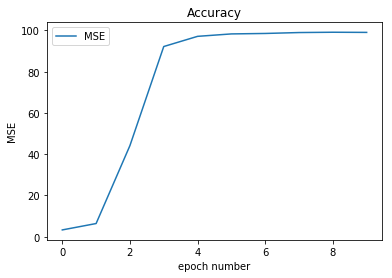

In [13]:
plt.plot(accuracy.T, label='MSE')
plt.title('Accuracy' )
plt.xlabel('epoch number')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [14]:
print accuracy

[[  3.31369661   6.40648012  44.1826215   92.19440353  97.1281296
   98.30633284  98.52724595  98.96907216  99.11634757  99.04270987]]


# Coordinate Descent

In [15]:
w_c = initial_w[:,:]

runs = 5
epoch = 5

loss_store = np.zeros([1,runs*epoch*w_c.shape[1]])
accuracy_c = np.zeros([1,epoch])

step = 1e-6
count = 0
for e in xrange(epoch):
    for r in xrange(runs):
        for i in xrange(w_c.shape[1]):

            dw = -(train_y.T - w_c.dot(train.T)).dot(train)
            dw /= n
            
            w_c[:,i] = w_c[:,i] - step*dw[:,i]
            #Backtracking
            
            loss = 0.5*(train_y.T - w_c.dot(train.T)).dot(train_y - w_c.dot(train.T).T)
            loss /= n
            
        predict_valid = w_c.dot(valid.T).T
        predicted = (predict_valid > 0) + 0
        predicted[predicted == 0] = -1
        loss_store[:,count] = loss
        print "-------------- ", r, " --------------"
        print "Loss: ", loss_store[:,count]
        count += 1

    accuracy_c[:,e] = np.sum((predicted == valid_y) + 0)/(1.0*valid_y.shape[0]) * 100
    print
    print "Validation accuracy: ", accuracy_c[:,e]


--------------  0  --------------
Loss:  [ 4.37258233]
--------------  1  --------------
Loss:  [ 1.81063946]
--------------  2  --------------
Loss:  [ 1.24834914]
--------------  3  --------------
Loss:  [ 0.99728509]
--------------  4  --------------
Loss:  [ 0.82650704]

Validation accuracy:  [ 78.12960236]
--------------  0  --------------
Loss:  [ 0.69594433]
--------------  1  --------------
Loss:  [ 0.59297954]
--------------  2  --------------
Loss:  [ 0.51062255]
--------------  3  --------------
Loss:  [ 0.4440662]
--------------  4  --------------
Loss:  [ 0.38980052]

Validation accuracy:  [ 87.92341679]
--------------  0  --------------
Loss:  [ 0.34520044]
--------------  1  --------------
Loss:  [ 0.30827133]
--------------  2  --------------
Loss:  [ 0.27747835]
--------------  3  --------------
Loss:  [ 0.251628]
--------------  4  --------------
Loss:  [ 0.22978416]

Validation accuracy:  [ 92.48895434]
--------------  0  --------------
Loss:  [ 0.21120712]
---------

In [16]:
predict_test_c = w_c.dot(test.T).T
predicted_test_c = (predict_test_c > 0) + 0
predicted_test_c[predicted_test_c == 0] = -1
accuracy_test_c = np.sum((predicted_test_c == test_y) + 0)/(1.0*test_y.shape[0]) * 100
print accuracy_test_c

96.9072164948
